# Finding Heavy Traffic Indicators on I-94
## Goal: To determine a few indicators of heavy traffic on I-94
## These indicators can be weather type, time of the day, time of the week, etc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

## Printing first few rows of the dataset

In [2]:
directory = 'C:/Personal Projects/Dataquest/Python Project/Finding Heavy Traffic Indicators on I-94/'
df = pd.read_csv(directory + 'Metro_Interstate_Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## Data exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
df.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,48204,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,12,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,48143,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


In [5]:
df.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

In [6]:
df.shape

(48204, 9)

## Data Cleaning and Transformation

In [7]:
df.date_time = pd.to_datetime(df.date_time)

In [8]:
df.dtypes

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
dtype: object

## Data Analysis

### Plotting Histogram to examine the distribution of the traffic_volume

<AxesSubplot: ylabel='Frequency'>

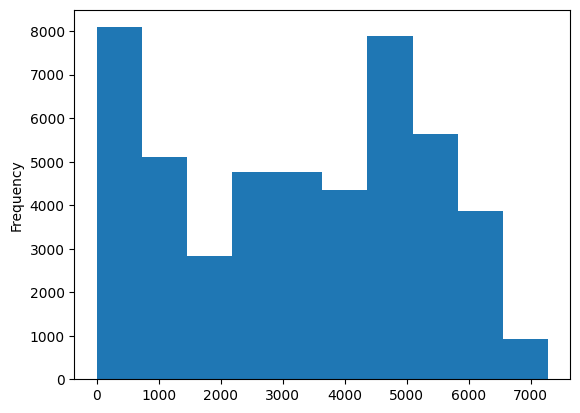

In [9]:
df.traffic_volume.plot(kind='hist')

## A few statistics about the traffic_volume

In [10]:
df.traffic_volume.describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

## Isolating daytime and night time
- 7am to 7pm is daytime
- 7pm to 7am is nighttime

In [11]:
df['hours'] = df.date_time.dt.hour

In [12]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hours
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13
...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22


In [13]:
ge7 = df.hours >= 7
lt19 = df.hours < 19

boolean = ge7 & lt19

daytime = df[boolean]

In [14]:
nighttime = df[(df.hours >= 19) | (df.hours < 7)]

In [15]:
daytime

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hours
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13
...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,15
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,15
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,16
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,17


In [16]:
nighttime

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hours
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539,19
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784,20
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361,21
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529,22
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963,23
...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22


## Plotting the histograms of traffic_volume for both day and night

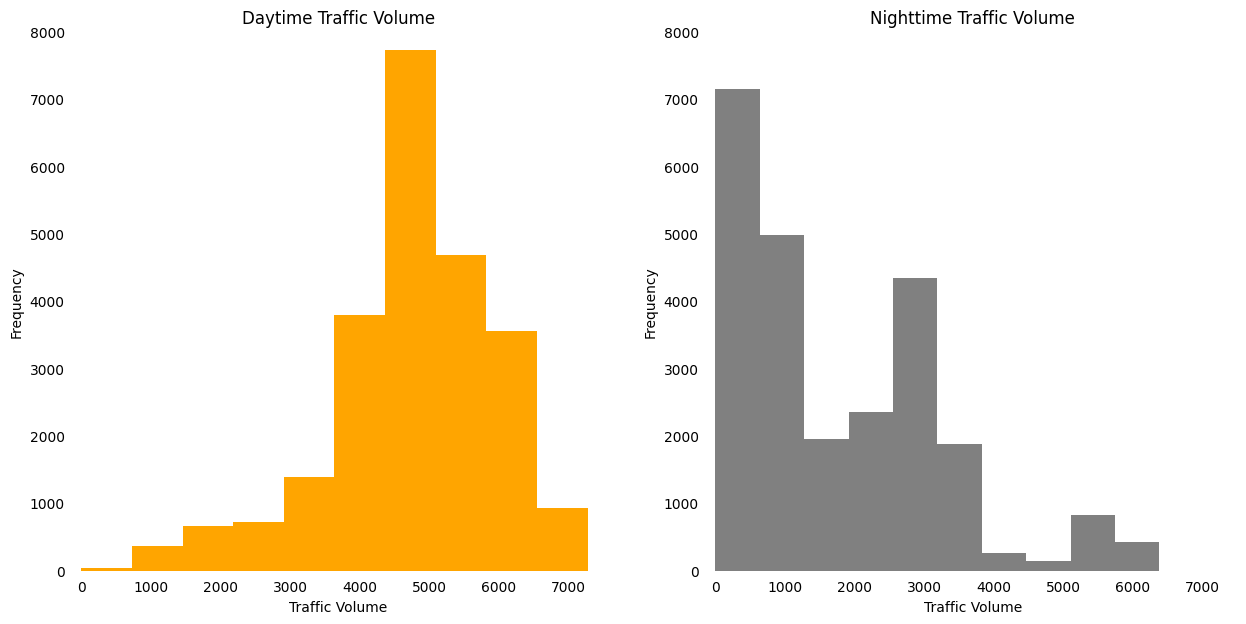

In [82]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 7))
ax1.hist(daytime.traffic_volume, color='orange')
ax1.title.set_text('Daytime Traffic Volume')
ax1.set_xlabel('Traffic Volume')
ax1.set_ylabel('Frequency')
ax1.axis(xmin= -100, xmax = 7500)
ax1.axis(ymin= 0, ymax = 8000)
for location in ['left','right','top','bottom']:
    ax1.spines[location].set_visible(False)
ax1.tick_params(bottom=False, left=False)

ax2.hist(nighttime.traffic_volume, color='gray')
ax2.title.set_text('Nighttime Traffic Volume')
ax2.set_xlabel('Traffic Volume')
ax2.set_ylabel('Frequency')
ax2.axis(xmin= -100, xmax = 7500)
ax2.axis(ymin= 0, ymax = 8000)
for location in ['left','right','top','bottom']:
    ax2.spines[location].set_visible(False)
ax2.tick_params(bottom=False, left=False)

In [18]:
daytime.traffic_volume.describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [19]:
nighttime.traffic_volume.describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

- Daytime traffic volume hist shape is left-skewed. Nighttime is right-skewed. 
- During the daytime, peopel go to work. So as time goes, there's more traffic volume
- During the nighttime, people go home from work. And they rest at home, so there's less traffic volume

## Getting the monthly traffic volume averages

In [20]:
daytime['month'] = daytime.date_time.dt.month

C:\Users\andya\AppData\Local\Temp\ipykernel_18716\2241197746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['month'] = daytime.date_time.dt.month


In [21]:
daytime.groupby('month')['traffic_volume'].mean()

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

## Data Visualization And Data Analysis
## Generating a line plot to visualize how the traffic volume changed each month on average

<AxesSubplot: xlabel='month'>

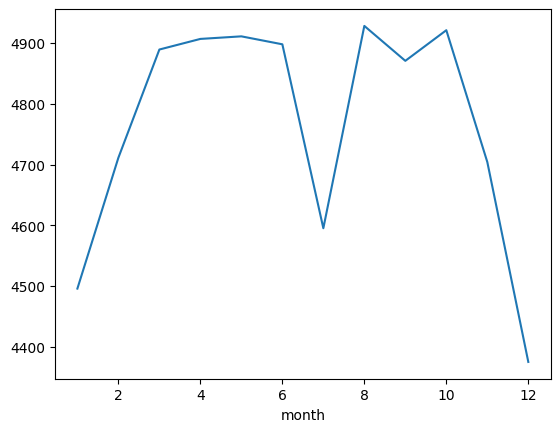

In [22]:
daytime.groupby('month')['traffic_volume'].mean().plot(kind='line')

- Volume of the traffic is really low on 1, 11, 12. This is due to holidays
- July is possibly low as well due to some reason such as construction

In [23]:
daytime['day'] = daytime.date_time.dt.day
daytime.groupby('day')['traffic_volume'].mean()

C:\Users\andya\AppData\Local\Temp\ipykernel_18716\3629151046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['day'] = daytime.date_time.dt.day


day
1     4690.050279
2     4773.716931
3     4783.224287
4     4516.675090
5     4696.973510
6     4837.822275
7     4911.746442
8     4918.431759
9     4887.986111
10    4800.944444
11    4628.781481
12    4793.220382
13    4869.044199
14    4753.827456
15    4740.972903
16    4691.308161
17    4839.034956
18    4896.521144
19    4844.407666
20    4861.648521
21    4931.483617
22    4761.195946
23    4604.023632
24    4593.352651
25    4595.329975
26    4610.904145
27    4747.385827
28    4754.728302
29    4752.523664
30    4732.939742
31    4851.864679
Name: traffic_volume, dtype: float64

In [24]:
quick_df = daytime[daytime.month == 7]

<AxesSubplot: xlabel='day'>

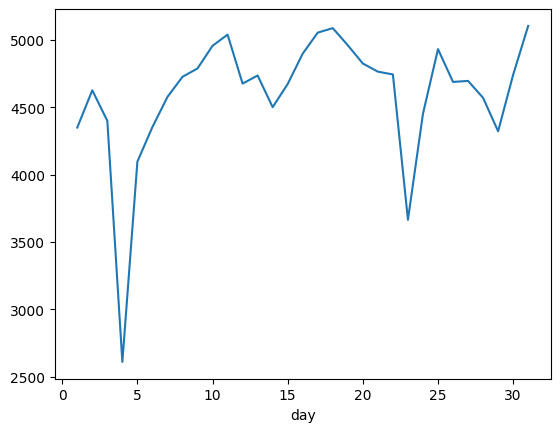

In [25]:
quick_df.groupby('day')['traffic_volume'].mean().plot(kind='line')

In [26]:
daytime['year'] = daytime.date_time.dt.year
daytime.groupby('year')['traffic_volume'].mean()

C:\Users\andya\AppData\Local\Temp\ipykernel_18716\4024916442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['year'] = daytime.date_time.dt.year


year
2012    4675.346861
2013    4834.084298
2014    4765.309296
2015    4748.448485
2016    4637.518293
2017    4865.961752
2018    4726.280534
Name: traffic_volume, dtype: float64

<AxesSubplot: xlabel='year'>

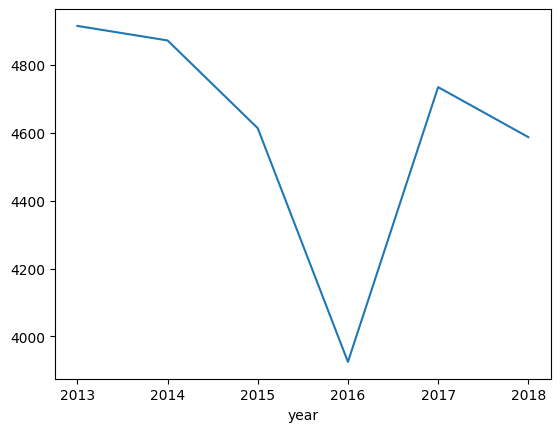

In [27]:
quick_df2 = daytime[daytime.month == 7]
quick_df2.groupby('year')['traffic_volume'].mean().plot(kind='line')

- July, 2016, the traffic volume is significantly low

## Generating a line plot to visualize how the traffic volume changed each day of the week on average

C:\Users\andya\AppData\Local\Temp\ipykernel_18716\512248884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
C:\Users\andya\AppData\Local\Temp\ipykernel_18716\512248884.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_dayofweek = daytime.groupby('dayofweek').mean()


<AxesSubplot: xlabel='dayofweek'>

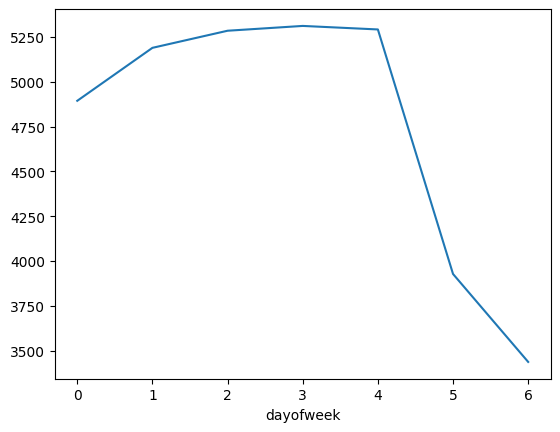

In [28]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot(kind='line')  # 0 is Monday, 6 is Sunday


- Traffic volume significantly starting to become less starting on Friday

In [29]:
daytime

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hours,month,day,year,dayofweek
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,10,2,2012,1
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,10,2,2012,1
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,10,2,2012,1
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,10,2,2012,1
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,10,2,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,15,9,30,2018,6
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,15,9,30,2018,6
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,16,9,30,2018,6
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,17,9,30,2018,6


In [30]:
business_days = daytime[(daytime.dayofweek >= 1) & (daytime.dayofweek < 5)]
business_days

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hours,month,day,year,dayofweek
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,10,2,2012,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,10,2,2012,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,10,2,2012,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,10,2,2012,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,10,2,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48143,None,285.00,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 14:00:00,5193,14,9,28,2018,4
48144,None,285.14,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 15:00:00,5838,15,9,28,2018,4
48145,None,285.33,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 16:00:00,6188,16,9,28,2018,4
48146,None,285.24,0.0,0.0,75,Clouds,broken clouds,2018-09-28 17:00:00,5695,17,9,28,2018,4


In [31]:
weekend = daytime[daytime.dayofweek >= 5]
weekend

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hours,month,day,year,dayofweek
87,None,275.17,0.00,0.0,1,Clear,sky is clear,2012-10-06 07:00:00,2072,7,10,6,2012,5
88,None,274.99,0.00,0.0,1,Clear,sky is clear,2012-10-06 08:00:00,3342,8,10,6,2012,5
89,None,275.09,0.00,0.0,40,Clouds,scattered clouds,2012-10-06 09:00:00,4258,9,10,6,2012,5
90,None,276.88,0.00,0.0,20,Clouds,few clouds,2012-10-06 10:00:00,4861,10,10,6,2012,5
91,None,278.04,0.00,0.0,20,Clouds,few clouds,2012-10-06 11:00:00,5191,11,10,6,2012,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,15,9,30,2018,6
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,15,9,30,2018,6
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,16,9,30,2018,6
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,17,9,30,2018,6


In [42]:
bd = business_days.groupby('hours')['traffic_volume'].mean()
wd = weekend.groupby('hours')['traffic_volume'].mean()

In [78]:
bd.describe()

count      12.000000
mean     5271.052272
std       608.841304
min      4453.274262
25%      4885.277860
50%      5102.773020
75%      5720.851622
max      6268.122449
Name: traffic_volume, dtype: float64

In [79]:
wd.describe()

count      12.000000
mean     3709.128440
std       911.307344
min      1589.365894
25%      3542.880206
50%      4098.037442
75%      4346.478609
max      4372.482883
Name: traffic_volume, dtype: float64

(6.0, 19.0, 1500.0, 4500.0)

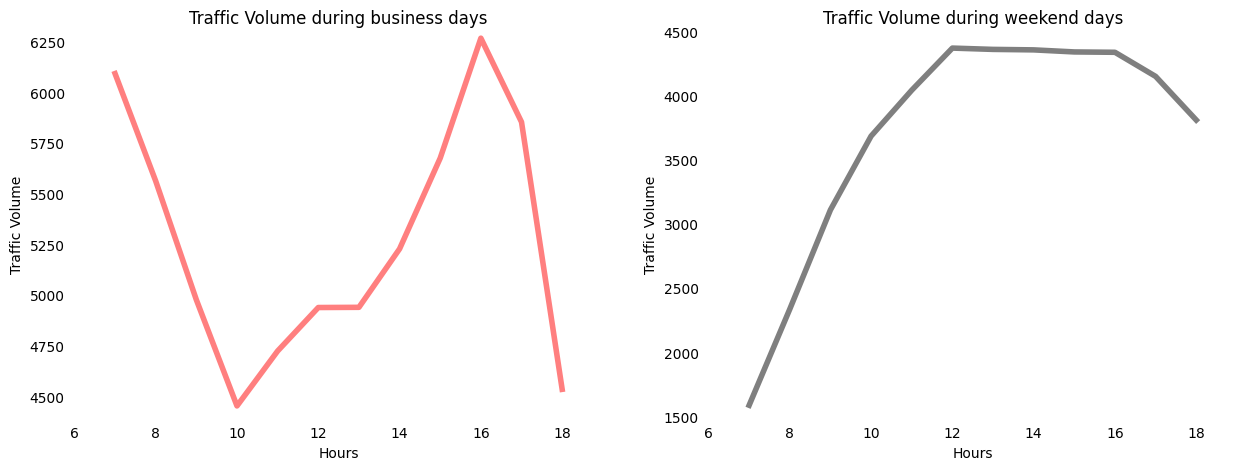

In [80]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols = 2, figsize = (15, 5))
ax1.plot(bd, color='red', alpha = 0.5, linewidth = 4)
ax1.title.set_text('Traffic Volume during business days')
ax1.set_xlabel('Hours')
ax1.set_ylabel('Traffic Volume')
for location in ['left','right','top','bottom']:
    ax1.spines[location].set_visible(False)
ax1.tick_params(bottom=False, left=False)
ax1.axis(xmin= 6, xmax = 19)
ax1.axis(ymin= 4400, ymax = 6300)

ax2.plot(wd, color='black', alpha = 0.5, linewidth = 4)
ax2.title.set_text('Traffic Volume during weekend days')
ax2.set_xlabel('Hours')
ax2.set_ylabel('Traffic Volume')
for location in ['left','right','top','bottom']:
    ax2.spines[location].set_visible(False)
ax2.tick_params(bottom=False, left=False) 
ax2.axis(xmin= 6, xmax = 19)
ax2.axis(ymin= 1500, ymax = 4500)

- Around 7AM - 9AM, people go to work so the traffic is really heavy. Around 16-18, people go home so the traffic is also heavy
- During the weekend, traffic isn't as heavy as during the weekdays. But there's still traffic. This is because people go out to do some activities, go to church, or some people still go to work during the weekends

## Correlation values between traffic_volume and the numerical weather columns and generating Scatter Plot

In [90]:
daytime[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

In [97]:
daytime.temp.describe()

count    23877.000000
mean       282.257596
std         13.298885
min          0.000000
25%        272.680000
50%        283.780000
75%        293.440000
max        310.070000
Name: temp, dtype: float64

(230.0, 320.0)

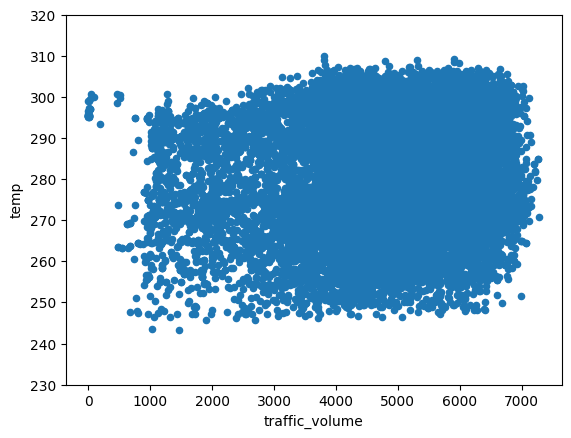

In [98]:
daytime.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320)

## Plot a horizontal bar plot for the traffic_volume column of by_weather_main

<AxesSubplot: ylabel='weather_main'>

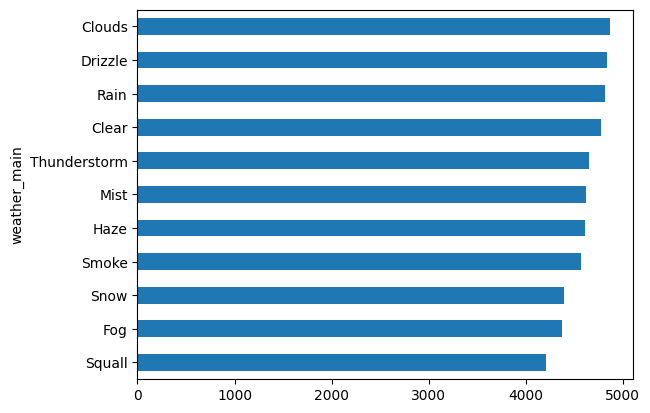

In [105]:
daytime.groupby('weather_main')['traffic_volume'].mean().sort_values().plot(kind='barh')

- No volume exceeding 5000. But Clouds, Drizzle, And Rain weathers are close to 5000

<AxesSubplot: ylabel='weather_description'>

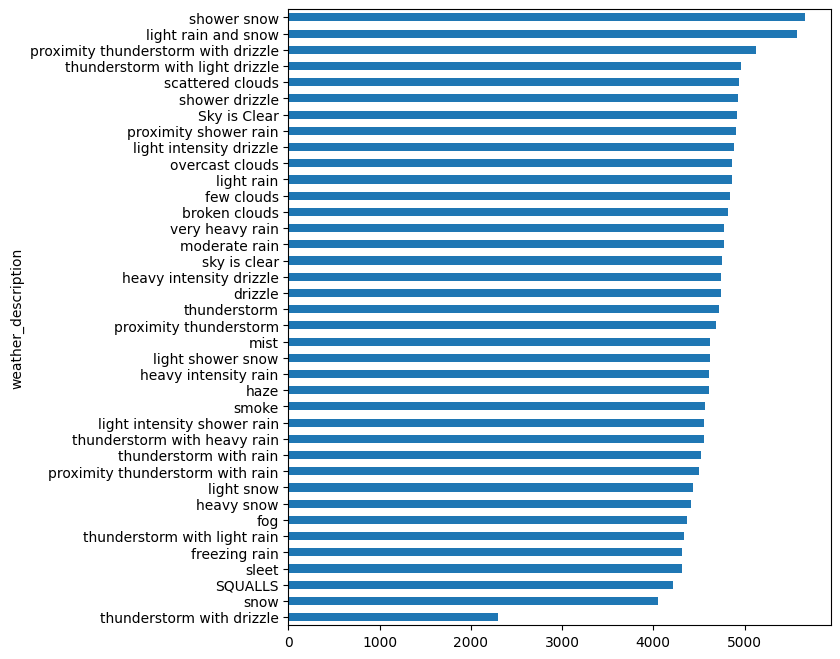

In [112]:
daytime.groupby('weather_description')['traffic_volume'].mean().sort_values().plot(kind='barh', figsize=(7, 8))

- Shower snow, light rain and snow, and proximity thunderstorm with drizzle exceeded over 5000 volumes